# Ejercicios Aprendizaje Automático.

Juan García.
01/10/2016

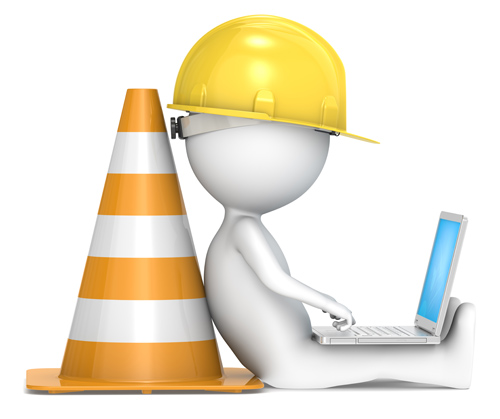

In [63]:
from IPython.display import Image
Image(filename='images/construccion.jpg')

## 1. Reglas de asociación.

En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes.

In [64]:
# Cargamos el fichero CSV de datos
import csv
groceries = []
groceries_file = csv.reader(open("data/groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)

# Mostramos algunos de los datos cargados
print 'Los datos se cargan en una variable de tipo: ', type(groceries)
groceries[:10]

Los datos se cargan en una variable de tipo:  <type 'list'>


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

### 1.1 Obtener las lista de artículos que tiene un soporte mínimo de 0,15.

In [65]:
# Importamos la librería apriori.py (descargada previamente de la url sugerida en el enunciado del ejercicio)
import apriori

In [66]:
# Ejecutamos el algoritmo apriori para obtener los k-items frecuentes (F) y el soporte de cada uno de ellos
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


### 1.2 Obtener las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

In [67]:
# Primero calculamos el soporte mínimo de 0,05
F, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


In [68]:
# A continuación calculamos las reglas de asociación con una confianza de 0,25.
H = apriori.generate_rules(F, soporte, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


## 2. Implementación de una regresión “stepwise” con eliminación hacia atrás.

Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb” realizar una implementación del del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la produce el modelo menos significativo.

In [69]:
def forward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

#forward_regression(x, y)

In [70]:
def backward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables

## 3 Estimación de la supervivencia de los pasajeros del Titanic.

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.

Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.

En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas con estos valores se puede utilizar el siguiente comando:

    mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
    titanic = titanic[-mask.any(axis = 1)]

In [72]:
# Importamos las librerías
import pandas as pd
import numpy as np

# Configuración para mostrar las gráficas
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [73]:
# Cargamos el fichero CSV con los datos de pasajeros del Titanic
titanic = pd.read_csv("data/titanic.csv", sep=",")

# Mostramos algunos de los datos cargados
print 'Los datos se cargan en la variable: titanic'
print 'La variable titanic es de tipo: ', type(titanic)
print 'La variable titanic tiene', len(titanic), "filas (pasajeros)."
titanic.head()


Los datos se cargan en la variable: titanic
La variable titanic es de tipo:  <class 'pandas.core.frame.DataFrame'>
La variable titanic tiene 1309 filas (pasajeros).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [74]:
# Eliminamos las columnas 'boat' y 'body', porque contienen información posterior al momento del embarque
del titanic['boat']
del titanic['body']
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [75]:
# Eliminamos las filas que contengan valores NaN en las columnas “age” y “fare”
titanic_org = titanic
titanic = titanic_org.dropna(how='any', subset=['age', 'fare'])
print 'Número total de pasajeros:', len(titanic_org)
print 'Número de pasajeros después de eliminar NaN en age y fare:', len(titanic)
print 'Número de filas de datos (pasajeros) descartadas:', (len(titanic_org) - len(titanic))
titanic.head()

Número total de pasajeros: 1309
Número de pasajeros después de eliminar NaN en age y fare: 1045
Número de filas de datos (pasajeros) descartadas: 264


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [76]:
# Creamos listas con los tipos de variables
var_categoricas = ['name', 'sex', 'cabin', 'embarked', 'home.dest']
var_continuas   = ['age', 'fare']
var_discretas   = ['pclass', 'survived', 'sibsp', 'parch']
var_target      = titanic['survived']

In [77]:
# Obtenemos la variabilidad de cada una de las variables
titanic.T.apply(lambda x: x.nunique(), axis=1)

pclass          3
survived        2
name         1043
sex             2
age            97
sibsp           7
parch           7
ticket        731
fare          256
cabin         174
embarked        3
home.dest     348
dtype: int64

In [78]:
# Eliminamos las variables que muestran mayor variabilidad y no aportan información relevante: name, ticket y home.dest
del titanic['name']
del titanic['ticket']
del titanic['home.dest']
titanic.head()
titanic.T.apply(lambda x: x.nunique(), axis=1)

pclass        3
survived      2
sex           2
age          97
sibsp         7
parch         7
fare        256
cabin       174
embarked      3
dtype: int64

In [79]:
# Obtenemos los valores distintos de la variable objetivo
print 'Valores de la variable survived: ', titanic.survived.unique()
# Obtenemos los valores distintos de las variables que muestran menor variabilidad
print 'Valores de la variable pclass..: ', titanic.pclass.unique()
print 'Valores de la variable sex.....: ', titanic.sex.unique()
print 'Valores de la variable sibsp...: ', titanic.sibsp.unique()
print 'Valores de la variable parch...: ', titanic.parch.unique()
print 'Valores de la variable embarked: ', titanic.embarked.unique()
print 'Valores de la variable age.....: ', titanic.age.unique()
print 'Valores de la variable fare....: ', titanic.fare.unique()
print 'Valores de la variable cabin...: ', titanic.cabin.unique()

Valores de la variable survived:  [1 0]
Valores de la variable pclass..:  [1 2 3]
Valores de la variable sex.....:  ['female' 'male']
Valores de la variable sibsp...:  [0 1 2 3 4 5 8]
Valores de la variable parch...:  [0 2 1 4 3 5 6]
Valores de la variable embarked:  ['S' 'C' nan 'Q']
Valores de la variable age.....:  [ 29.     0.92   2.    30.    25.    48.    63.    39.    53.    71.    47.
  18.    24.    26.    80.    50.    32.    36.    37.    42.    19.    35.
  28.    45.    40.    58.    22.    41.    44.    59.    60.    33.    17.
  11.    14.    49.    76.    46.    27.    64.    55.    70.    38.    51.
  31.     4.    54.    23.    43.    52.    16.    32.5   21.    15.    65.
  28.5   45.5   56.    13.    61.    34.     6.    57.    62.    67.     1.
  12.    20.     0.83   8.     0.67   7.     3.    36.5   18.5    5.    66.
   9.     0.75  70.5   22.5    0.33   0.17  40.5   10.    23.5   34.5   20.5
  30.5   55.5   38.5   14.5   24.5   74.     0.42  11.5   26.5 ]
Valore

In [80]:
# Creamos la función get_WoE para ponderar los valores de las variables
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    print "Obteniendo el Woe para la variable", var, ":"    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))

In [81]:
# Ponderación de la variable pclass
get_WoE(titanic, 'pclass', 'survived')

Obteniendo el Woe para la variable pclass :
  El WoE para 1 [ 284 ] es -0.563768043036
  El WoE para 2 [ 261 ] es 0.238674493345
  El WoE para 3 [ 500 ] es 1.03559932084


In [82]:
# Los valores de la variable pclass no requieren agrupación.

In [83]:
# Ponderación de la variable sex
get_WoE(titanic, 'sex', 'survived') 

Obteniendo el Woe para la variable sex :
  El WoE para female [ 388 ] es -1.1124056108
  El WoE para male [ 657 ] es 1.35239280944


In [84]:
# Los valores de la variable sex no requieren agrupación.

In [85]:
# Ponderación de la variable sibsp
get_WoE(titanic, 'sibsp', 'survived') 

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


In [86]:
# En la variable sibsp hay muy pocas ocurrencias de los valores 2, 3, 4, 5 y 8 en comparación de los valores 0 y 1.
# Por ello vamos a reagrupar los valores y crear una nueva clasificación sibspX: 
titanic.loc[:, 'sibspX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'sibsp'] in (0, 3):
        titanic.loc[row, 'sibspX'] = 'n0'
    elif titanic.loc[row, 'sibsp'] == 1:
        titanic.loc[row, 'sibspX'] = 'n1'
    elif titanic.loc[row, 'sibsp'] == 2:
        titanic.loc[row, 'sibspX'] = 'n2'
    else:
        titanic.loc[row, 'sibspX'] = 'nX'
        
get_WoE(titanic, 'sibspX', 'survived') 

Obteniendo el Woe para la variable sibspX :
  El WoE para n0 [ 700 ] es 0.519979005752
  El WoE para n1 [ 280 ] es -0.100083458557
  El WoE para n2 [ 36 ] es 0.223143551314
  El WoE para nX [ 29 ] es 2.15948424935


In [87]:
# Ponderación de la variable parch
get_WoE(titanic, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


In [88]:
# En la variable parch hay muy pocas ocurrencias de los valores 3, 4, 5 y 6 en comparación de los valores 0, 1 y 2.
# Por ello vamos a reagrupar los valores y crear una nueva clasificación parchX: 
titanic.loc[:, 'parchX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'parch'] == 0:
        titanic.loc[row, 'parchX'] = 'n0'
    elif titanic.loc[row, 'parch'] == 1:
        titanic.loc[row, 'parchX'] = 'n1'
    elif titanic.loc[row, 'parch'] == 2:
        titanic.loc[row, 'parchX'] = 'n2'
    elif titanic.loc[row, 'parch'] == 3:
        titanic.loc[row, 'parchX'] = 'n3'
    else:
        titanic.loc[row, 'parchX'] = 'nX'
        
get_WoE(titanic, 'parchX', 'survived') 

Obteniendo el Woe para la variable parchX :
  El WoE para n0 [ 767 ] es 0.610168067098
  El WoE para n1 [ 160 ] es -0.379489621705
  El WoE para n2 [ 97 ] es -0.269663566949
  El WoE para n3 [ 8 ] es -0.510825623766
  El WoE para nX [ 13 ] es 1.70474809224


In [89]:
# Ponderación de la variable embarked
get_WoE(titanic, 'embarked', 'survived')

Obteniendo el Woe para la variable embarked :
  El WoE para C [ 212 ] es -0.500775287912
  El WoE para Q [ 50 ] es 1.04596855518
  El WoE para S [ 781 ] es 0.581816497916


In [90]:
# Los valores de la variable sex no requieren agrupación.

### Análisis de las variables continuas
Las variables continuas se pueden analizar mediante la utilización de histogramas.
Se puede analizar si el histograma de positivos es igual al histograma de negativos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f547e00a9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f547ddb88d0>]], dtype=object)

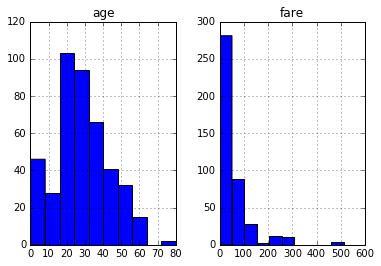

In [91]:
# Histograma de positivos
titanic[var_continuas][var_target == 1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f548ea8e0d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f547dea0cd0>]], dtype=object)

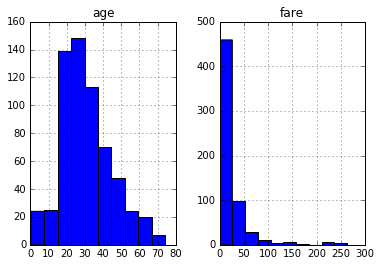

In [92]:
# Histograma de negativos
titanic[var_continuas][var_target == 0].hist()

In [125]:
# Pasamos los datos a una lista
ltitanic = titanic.values.tolist()
type(ltitanic)
ltitanic[:2]

[[1,
  1,
  'Allen, Miss. Elisabeth Walton',
  'female',
  29.0,
  0,
  0,
  '24160',
  211.3375,
  'B5',
  'S',
  'St Louis, MO'],
 [1,
  1,
  'Allison, Master. Hudson Trevor',
  'male',
  0.92,
  1,
  2,
  '113781',
  151.55,
  'C22 C26',
  'S',
  'Montreal, PQ / Chesterville, ON']]

In [ ]:
# Variables  discretas: pclass, survived, sibsp, parch, ticket
# variables continuas: age, fare
# Variable a predecir: survived

In [133]:
# Configuramos la muestra interactiva de gráficas
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6e8320bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6e8276210>]], dtype=object)

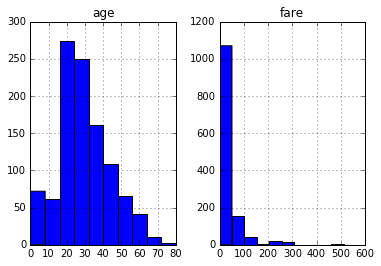

In [137]:
# Análisis de las variables continuas: age, fare
titanic.hist(var_continuas)


In [135]:
# Análisis de las variables discretas: pclass, sibsp, parch
